# Импорты

In [ ]:
# import requests as req

# Для работы с таблицами
import pandas as pd
import numpy as np

# Для работы со смайликами в тексте
import emoji

# Для превращения смайликов в слова
import demoji

In [2]:
import nltk
from nltk.corpus import stopwords
import pymorphy3
from tqdm.auto import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nltk.download('stopwords')

d:\Уник\АВИШ\5 семестр\Анализ больших текстовых данных и текстовый поиск\Курсовая работа\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Telegram (проверка данных, полученных с помощью парсера)

In [3]:
df_telegram = pd.read_csv('chats1.csv')

In [4]:
df_telegram2 = pd.read_csv('chats2.csv')

In [5]:
df_telegram.head(10)

message
0  В декабре на ВКМСК приступает к работе новое с...
1  ❓Вы знали, где находится первая и единственная...
2                                                NaN
3                                                NaN
4                                                NaN
5                                                NaN
6                                                NaN
7  Сегодня страна отмечает День матери — день бла...
8                                                NaN
9                                                NaN

In [6]:
df_telegram2.head(10)

message
0                                                NaN
1  Буксир-толкач «Дунайский-65» на зимовке в Каза...
2                                                NaN
3                                                NaN
4                                                NaN
5  —Томас, где ваша ферма?\nСудя по открытой инфо...
6                                                NaN
7  🆘 Экипаж нефтяного танкера 🚢 Mersin (IMO: 9428...
8  Надстройка танкера KAIROS потушена.\n\nВскоре,...
9                                                NaN

In [7]:
df_telegram = pd.concat([df_telegram, df_telegram2])

# EDA

In [8]:
df_telegram

message
0     В декабре на ВКМСК приступает к работе новое с...
1     ❓Вы знали, где находится первая и единственная...
2                                                   NaN
3                                                   NaN
4                                                   NaN
...                                                 ...
9995                                                NaN
9996                                                NaN
9997  Красноармейский рейд ранним утром 26 октября 2...
9998                            🧳 Закат над Химкинским.
9999  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...

[13000 rows x 1 columns]

In [9]:
df_telegram = df_telegram.drop_duplicates()

In [10]:
df_telegram

message
0     В декабре на ВКМСК приступает к работе новое с...
1     ❓Вы знали, где находится первая и единственная...
2                                                   NaN
7     Сегодня страна отмечает День матери — день бла...
13    🇷🇺Сегодня в рамках совместного с Музеем морско...
...                                                 ...
9991  Буксир «Рита» (тип Полярник) выходил из реки Д...
9994  Буксир-толкач «Шлюзовой-240» с баржей «ВД-1256...
9997  Красноармейский рейд ранним утром 26 октября 2...
9998                            🧳 Закат над Химкинским.
9999  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...

[4508 rows x 1 columns]

In [11]:
df_telegram.iloc[1].message

'❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–2006 годах станция была восстановлена, возобновила работу в 2007 году как экспериментальная база для отработки новых гидроагрегатов и технологий сооружения приливных электростанций. \n\nСтанция изначально задумывалась как экспериментальная площадка для отработки целого ряда перспективных технологий, таких как наплавной способ возведения здания станции, обеспечение постоянной работы сооружений и оборудования в суровых климатических условиях и при воздействии морской воды.\nСтроительство ПЭС было произведено передовым для того времени наплавным способом — ж

In [12]:
len(df_telegram)

4508

In [13]:
df_telegram = df_telegram.dropna()

In [14]:
set_text = []
for name in df_telegram['message']:
    set_text.append(name)

In [15]:
set_text

['В декабре на ВКМСК приступает к работе новое судно обеспечения \n\nСудно «Берилл» усилит флот «Росморпорта», сейчас оно  находится в морском порту Астрахани.\n\n«Берилл» – головное судно проекта FPW1, предназначенное для комплексного сопровождения несамоходных земснарядов высокой производительности проекта FPDG3. \n\nВ задачи судна входит буксировка, снабжение топливом и водой, а также вспомогательные работы при дноуглублении. \n\nЛедовый класс Ice1 позволяет эксплуатировать «Берилл» круглогодично, включая зимний период.\n\n🖥Росморречфлот в MAX | ВК',
 '❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–

In [16]:
len(set_text)

4507

In [17]:
set_text = [line.strip() for line in set_text]

In [18]:
set_text

['В декабре на ВКМСК приступает к работе новое судно обеспечения \n\nСудно «Берилл» усилит флот «Росморпорта», сейчас оно  находится в морском порту Астрахани.\n\n«Берилл» – головное судно проекта FPW1, предназначенное для комплексного сопровождения несамоходных земснарядов высокой производительности проекта FPDG3. \n\nВ задачи судна входит буксировка, снабжение топливом и водой, а также вспомогательные работы при дноуглублении. \n\nЛедовый класс Ice1 позволяет эксплуатировать «Берилл» круглогодично, включая зимний период.\n\n🖥Росморречфлот в MAX | ВК',
 '❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–

In [19]:
df_telegram = pd.DataFrame(set_text, columns = ['text'])
df_telegram['goal'] = 'РосМорРечФлот'
df_telegram[:2]

text           goal
0  В декабре на ВКМСК приступает к работе новое с...  РосМорРечФлот
1  ❓Вы знали, где находится первая и единственная...  РосМорРечФлот

## Извелчение смайликов из текстов сообщений

In [20]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)

In [21]:
emoji_chat = [extract_emojis(s) for s in set_text]

In [22]:
emoji_chat

['🖥',
 '❓🖥',
 '⬆🦅',
 '',
 '',
 '🖥',
 '🔵🔵🔵🔵🔵🔵🖥',
 '⚡🖥',
 '🥇🥈🖥',
 '🖥',
 '📍🖥',
 '🖥',
 '🖥',
 '❓🖥',
 '🖥',
 '🖥',
 '',
 '👋🦅',
 '🖥',
 '🖥',
 '🖥',
 '🚚🔺🗺🚘🚢👷🏻♀🎓',
 '🖥',
 '🖥',
 '🦅',
 '🖥',
 '🖥',
 '⚡🖥',
 '⚡🖥',
 '🖥',
 '🔗',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '🤼🤼♀🤼♂🤼',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '❓',
 '🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '⬇▶▶▶▶🦅',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '',
 '📶',
 '',
 '🛰',
 '',
 '⚡',
 '⭕⭕⭕⭕⭕⭕⭕🦅',
 '',
 '🔵🔵🔵👆',
 '⚡',
 '🗺',
 '🛳',
 '🔵🔵🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '',
 '↗',
 '⚡',
 '',
 '',
 '📱',
 '🔵🔵',
 '❗',
 '',
 '',
 '',
 '📍📍',
 '✅✅✅',
 '',
 '',
 '',
 '',
 '🔵🔵',
 '🔵🔵🔵',
 '🏗✅🛳',
 '❓',
 '',
 '',
 '⚡',
 '🛳⬆🦅',
 '⚡',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵🔵⭐👆',
 '⏪⏩⬆🦅',
 '🌊',
 '❓🔵🔵🔵',
 '📆',
 '🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '👇',
 '',
 '🔵🔵🔵🔵',
 '⏪⏩🦅',
 '',
 '',
 '',
 '📱',
 '',
 '⚡',
 '🔍🔵🔵🔵🔵🔵🔵🔵',
 '🦅',
 '📄📄',
 '🛳',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '⚡',
 '⚡',
 '',
 '👍',
 '⚡',
 '',
 '↖↖🟦🟦🟦🟦',
 '',
 '',
 '🔵🔵🔵🔵',
 '⚡',
 '🗺',
 '🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵👆',
 '⚡🔵🔵🔵',
 '

In [23]:
emoji_chat_set = set(''.join(emoji_chat))
emoji_chat_set = ''.join(emoji_chat_set)
emoji_chat_set

'😱🌎🏁🎅☦☎⏩⚒🛰📶😉🧑⛲🚞🌊🚮⏭🌞🔍🌩↖🦊🛹🔗📢🛒😎🚨🫤🪧💙⚪🛥🌖💳💺🪵🚧♾🙍😢💯🚢🐤🏄🌾🚠♦🏖🏔👋↪🟠✳🤬⛏🌦🔥🌤🪝😆🫡👆⏰😮📊📁😍🌷🍄🥰🌫🔠🏟🎬⚓🤨📃🕕🎉🥇♥📰🚲🚒👽😣🤓🧳🤘🙏👨🔸⏮🛠🫣🪨💵👏☠🕗📴📞🌆📦📹⏹🤫⭕⌛🔻⚔🌱☑\U0001fa75🔡🌙🤗🔝👻🌝🖼👤🏴🍊🔔🏞❓😡🧡🚜🔆🏿🕛👅😗🦫🚫🚚☀🌳🗣〽☔🛫🔺💔🌟👩😇⛈🤯📅🍐🚂🌿🎄⬅😴💭🌨✅🛶👉🧫📜🔢🤷🏠🐻🏗👮📕🚆🚗😫🏊💠🎣🗼🕑📝😋➿🙄📷✉\U0001fa77⚽🦭📈🌸©😃🤍🐗🎛🕰😙🎗⚫🦑🔤🔎🌐🅰🤟🗓🦌📺⚙😛🕔🅿🫀⌨🚀🧊🔧♂🟥🛢⬛✏💻⛹🚘📩🛩🏻🫅🔖✔🏨📔🟩⤵➡🥊🔴🏙📣👍🌃🔒🌬🎊🫧📨🧱🌘🙁🎶🚤✊🌴🤴💬😒😝🏝🪚🔵🆕▫🟢⚡🕌🔄🙂🍁🪖📻🗺🅾🧭🎁😌🤔👀‼🏫🛤🖌👾🚌🧧😕❌🎡📋✌🧰😚👌🔭🌅💧☝↕💎🚴🍾✖😘🏰\U0001fa76🔬💲🦺🤎🚛🍏🏭🌡🟣🙋🌧⛄🤖🧵❎📲🎵📆📄➖💰🕐🟨🕋™®🎆🔊🍿⏺💨🖤😀🤩👥🌹▶🧹🏆🏅📒🥉🥶🚇🪜😰🌁💫🍀🤣🔹🥳⚜😔↗🏢🔱🐠😊🚰🚁📌🪔🤼❄🎼🕒💪🏋🍎🎈🎨🌒🗒⚕🗃🔑🛳🌇🏛🎖😞⛴📑🐟👈✈🙃👷🔣🏷🧐🤿🍂🎞🛡🌌🙈😈⚖💸🌽♀🪢🌉🆗➗🌀⛰🐶💿🐱🐬🎥⬇🍌🥹🔞📎🖊🚍😥⛪💐📸🚙♻⏱🥱🍒📚🗾🤪🌺🗯🦀📬🎺🍭📡🎩☃〰🫠🌏👄🥂🔰🟡🟦🌍🐊🚑🛟🤝💃✍ℹ🔟🏚💄📽🔼😜🛣⛓☺🚬🪁😂💥👇🥸🤙🚩☸😁🎙❗🌈⛷🥈🎓🕵🦅🧨📛😄🔌🖥⭐📐❕🙎🥲🌄🏳🕴📍☂🆘❤🥴🍽💡⛵💚🧍◾⚠📱☹⏪🙌🎂🐳🪱😏😳🗿🧯🦈👿⛔☁🦬🕹🚊⬆🆎⚛🔘✨⛽▪'

In [24]:
# Декодирования смайликов
dict_emoj = demoji.findall(''.join(emoji_chat))

In [25]:
# Создаем словарь
res = []
for key in dict_emoj.keys(): res.append(dict_emoj[key])

In [26]:
res

['face screaming in fear',
 'globe showing Americas',
 'chequered flag',
 'Santa Claus',
 'orthodox cross',
 'telephone',
 'fast-forward button',
 'hammer and pick',
 'satellite',
 'antenna bars',
 'winking face',
 'person',
 'fountain',
 'mountain railway',
 'water wave',
 'litter in bin sign',
 'next track button',
 'sun with face',
 'magnifying glass tilted left',
 'cloud with lightning',
 'up-left arrow',
 'fox',
 'skateboard',
 'link',
 'loudspeaker',
 'shopping cart',
 'smiling face with sunglasses',
 'police car light',
 'placard',
 'blue heart',
 'white circle',
 'motor boat',
 'waning gibbous moon',
 'credit card',
 'seat',
 'wood',
 'construction',
 'infinity',
 'person frowning',
 'crying face',
 'hundred points',
 'ship',
 'baby chick',
 'person surfing',
 'sheaf of rice',
 'mountain cableway',
 'diamond suit',
 'beach with umbrella',
 'snow-capped mountain',
 'waving hand',
 'left arrow curving right',
 'orange circle',
 'eight-spoked asterisk',
 'face with symbols on mout

## Обработка текстов

In [27]:
df_telegram

text           goal
0     В декабре на ВКМСК приступает к работе новое с...  РосМорРечФлот
1     ❓Вы знали, где находится первая и единственная...  РосМорРечФлот
2     Сегодня страна отмечает День матери — день бла...  РосМорРечФлот
3     🇷🇺Сегодня в рамках совместного с Музеем морско...  РосМорРечФлот
4                     #рекаморе\n\nВидео:\nЯн Сильченко  РосМорРечФлот
...                                                 ...            ...
4502  Буксир «Рита» (тип Полярник) выходил из реки Д...  РосМорРечФлот
4503  Буксир-толкач «Шлюзовой-240» с баржей «ВД-1256...  РосМорРечФлот
4504  Красноармейский рейд ранним утром 26 октября 2...  РосМорРечФлот
4505                            🧳 Закат над Химкинским.  РосМорРечФлот
4506  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...  РосМорРечФлот

[4507 rows x 2 columns]

In [28]:
result = []

for i in range(len(df_telegram)):
    text = df_telegram.iloc[i].iloc[0]

    #Удаление эмоджи
    text = ''.join([c for c in text if c not in emoji_chat_set])

    # text = text.replace('\n', '').replace('\r', '').replace('\t', '')
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub(' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    # text = ' '.join(text.split()).lower()
    text = re.sub(r'\s+', ' ', text).lower()

    result.append(text)

df = pd.DataFrame(result, columns=['posts'])
df

posts
0     в декабре на вкмск приступает к работе новое с...
1     вы знали где находится первая и единственная п...
2     сегодня страна отмечает день матери день благо...
3     сегодня в рамках совместного с музеем морского...
4                           рекаморе видео ян сильченко
...                                                 ...
4502  буксир рита тип полярник выходил из реки дубны...
4503  буксиртолкач шлюзовой240 с баржей вд1256п выхо...
4504  красноармейский рейд ранним утром 26 октября 2...
4505                               закат над химкинским
4506  буксиртолкач ота929 с приставкой сфс333 на рек...

[4507 rows x 1 columns]

Text(0, 0.5, 'Частота')

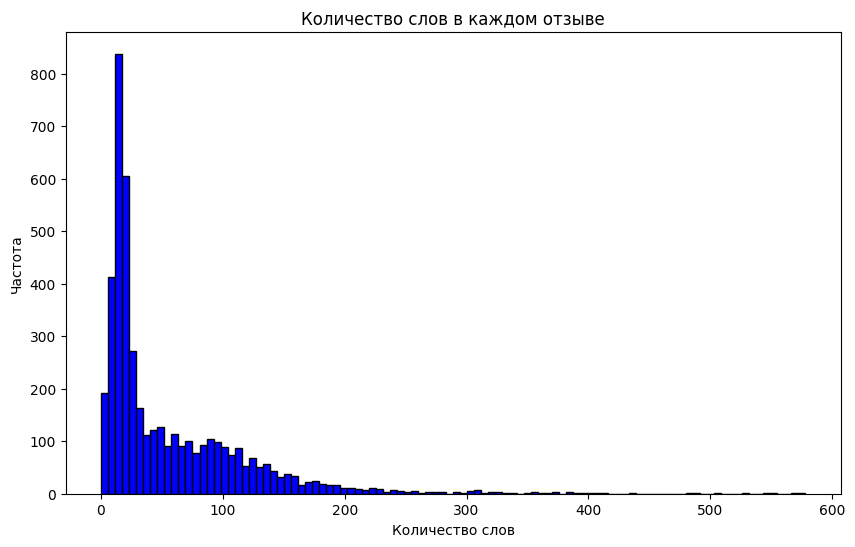

In [29]:
df['word_count'] = df['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue', edgecolor='black')
plt.title('Количество слов в каждом отзыве')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

In [30]:
df[df['word_count'] > 375]

posts  word_count
317   в нашей еженедельной рубрике ауреки рассказыва...         395
373   собрали подборку куда можно съездить летом и п...         485
379   вы начинающий диспетчер по движению судов на в...         382
599   опорафлота часть 2 рахматов эдуард николаевич ...         385
600   опорафлота часть 1 рахматов эдуард николаевич ...         503
1786   продолжая тему поднятую в дружественных канал...         382
2016  дунайский порт измаил расширенное подтверждени...         404
2994  пётр великий и речные трамвайчики в питере кот...         409
3028  валентин шашин буровое судно которое использов...         413
3039  как теплоход столкнулся с поездом засекреченна...         571
3312  7 малый охотник 174 бывший пограничный катер п...         578
3313  корабли краснознаменной ладожской военной флот...         547
3325  удаление мазута с затонувших танкеров два подх...         530
3397  материал о пожарном судне ко дню пожарной охра...         553
3550  самое большое научноисследовательское судно в ...         388
3708   14 марта 1987 года одна из скорбных дат в ист...         483
3931  50 лет со дня трагедии на зрс березина аш2012 ...         487
3992   тихрыбком выиграл спор с таможней о размере п...         392
4341  14 ноября 1920 г севастопольскую бухту покинул...         394
4471  у черного моря в исторических летописях есть 2...         434

In [31]:
# Уберем строки, где 'word_count' больше 375
texts_was = df.shape[0]
print(f"Было строк до фильтрации : {texts_was}")
df = df[df['word_count'] <= 375]

texts_now = df.shape[0]
print(f"Оставлено строк после фильтрации : {texts_now}")
print(f"Удалено {texts_was - texts_now} строк")
df

Было строк до фильтрации : 4507
Оставлено строк после фильтрации : 4487
Удалено 20 строк


posts  word_count
0     в декабре на вкмск приступает к работе новое с...          66
1     вы знали где находится первая и единственная п...         230
2     сегодня страна отмечает день матери день благо...         105
3     сегодня в рамках совместного с музеем морского...          61
4                           рекаморе видео ян сильченко           4
...                                                 ...         ...
4502  буксир рита тип полярник выходил из реки дубны...          25
4503  буксиртолкач шлюзовой240 с баржей вд1256п выхо...          31
4504  красноармейский рейд ранним утром 26 октября 2...          50
4505                               закат над химкинским           3
4506  буксиртолкач ота929 с приставкой сфс333 на рек...          13

[4487 rows x 2 columns]

## Лематизация

In [32]:
# создаём морфологический анализатор
morph = pymorphy3.MorphAnalyzer()

if 'russian_stopwords' not in locals():
      russian_stopwords = stopwords.words("russian")
      russian_stopwords.append('судно')

texts_as_lists = []

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^а-яё]', ' ', text) # Удаление пунктуации, кроме пробелов
        # разбиваем на слова
        words = text.split()
        # приводим к леммам, убираем стоп-слова и короткие слова
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in russian_stopwords and len(word) > 2]
        texts_as_lists.append(lemmas)
        return " ".join([lemma for lemma in lemmas if lemma not in russian_stopwords])
    return "" # Возвращаем пустую строку для нестроковых значений

print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'posts' in df.columns:
    tqdm.pandas()
    df['posts'] = df['posts'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df)


Начало предобработки текста...


100%|██████████| 4487/4487 [00:17<00:00, 251.90it/s]

Предобработка текста завершена.



C:\Users\melni\AppData\Local\Temp\ipykernel_17552\2266821242.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posts'] = df['posts'].progress_apply(preprocess_text)


posts  word_count
0     декабрь вкмск приступать работа новый обеспече...          66
1     знать находиться первый единственный приливный...         230
2     сегодня страна отмечать день мать день благода...         105
3     сегодня рамка совместный музей морской речной ...          61
4                              рекамора видео сильченко           4
...                                                 ...         ...
4502  буксир рита тип полярник выходить река дубна в...          25
4503  буксиртолкач шлюзовый баржа выход река дубна в...          31
4504  красноармейский рейд ранний утром октябрь год ...          50
4505                                   закат химкинский           3
4506  буксиртолкач ота приставка сфс река волга сама...          13

[4487 rows x 2 columns]

In [33]:
all_words = " ".join(df['posts']).split()
len(all_words)

178160

## Визуализация исходных данных

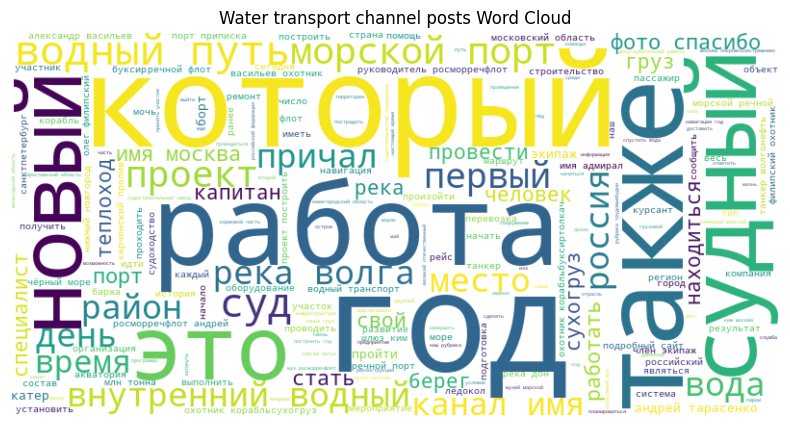

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(''.join(list(df['posts'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Water transport channel posts Word Cloud")
plt.show()

Слова  Количество
0             год        1975
1         корабль        1958
2         охотник        1771
3         морской        1310
4            порт        1273
5          работа        1096
6          москва        1073
7            река        1006
8   росморречфлот         966
9        теплоход         953
10        область         951
11         проект         918
12        который         871
13           флот         724
14         речной         667
15         судный         644
16         водный         622
17         танкер         605
18       сухогруз         605
19          также         602

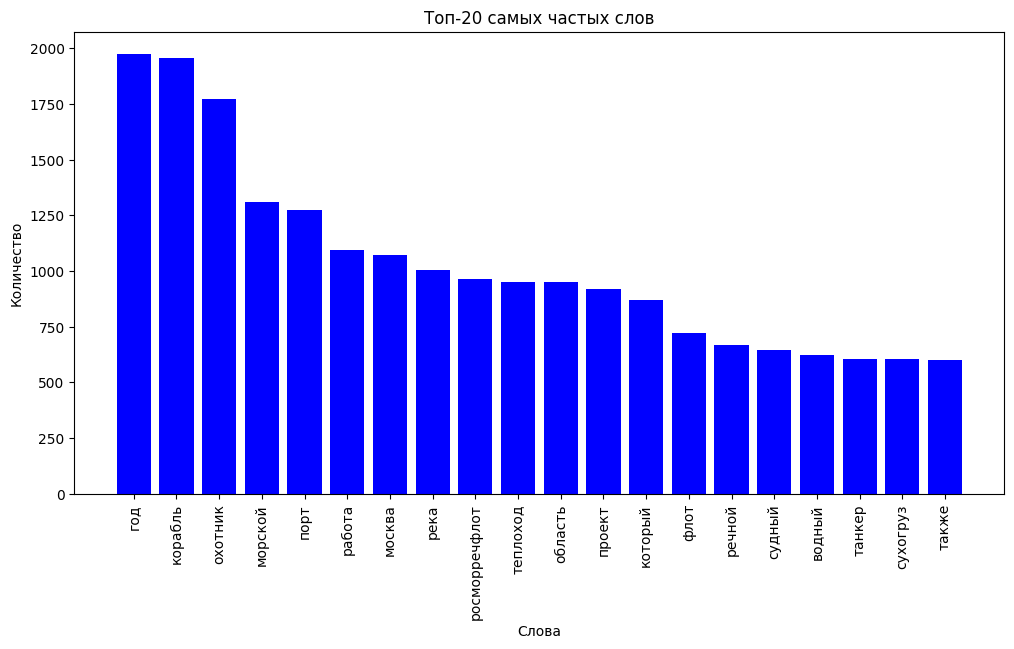

In [35]:
from collections import Counter
all_words = " ".join(df['posts']).split()
word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)
words, counts = zip(*top_20)
display(pd.concat([pd.DataFrame(words, columns=['Слова']), pd.DataFrame(counts, columns=['Количество'])], axis=1))

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='blue')
plt.xticks(rotation=90)
plt.title("Топ-20 самых частых слов")
plt.ylabel("Количество")
plt.xlabel("Слова")
plt.show()

# Векторизация

In [36]:
# Векторизация текста
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words=russian_stopwords, max_df=0.8, min_df=2)
dataset = count_vectorizer.fit_transform(df['posts'])

# LDA (5 тем)

## Модель

In [37]:
lda = LDA(n_components = 5,
         max_iter=10,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda.fit(dataset)

LatentDirichletAllocation(n_components=5, n_jobs=-1, random_state=42)

## Итог

In [38]:
# Функция для визуализации 'no_top_words' самых значимых слов в каждой теме
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:", ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [39]:
tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 15)

Тема 1: работа, танкер, волгонефть, специалист, мазут, часть, морспасслужба, море, нефтепродукт, судный, ликвидация, танкер волгонефть, акватория, который, филиал
Тема 2: морской, росморречфлот, год, россия, флот, транспорт, речной, который, день, вуз, руководитель, андрей, имя, страна, адмирал
Тема 3: корабль, охотник, охотник корабль, москва, теплоход, область, река, сухогруз, волга, спасибо, шлюз, буксиртолкач, фото, порт, канал
Тема 4: год, судный, вода, который, порт, экипаж, время, море, борт, капитан, это, место, человек, находиться, произойти
Тема 5: год, проект, порт, морской, путь, водный, росморречфлот, работа, бассейн, водный путь, груз, навигация, внутренний, морской порт, внутренний водный


## Темы

Тема 1: Водные проекты России 

Тема 2: Корабли и учёба 

Тема 3: География водоёмов 

Тема 4: Морская история 

Тема 5: Нефть и аварии 

In [40]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(dataset))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(dataset))

# See model parameters
print(lda.get_params())

Log Likelihood:  -757360.9470951217
Perplexity:  425.3375617940195
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


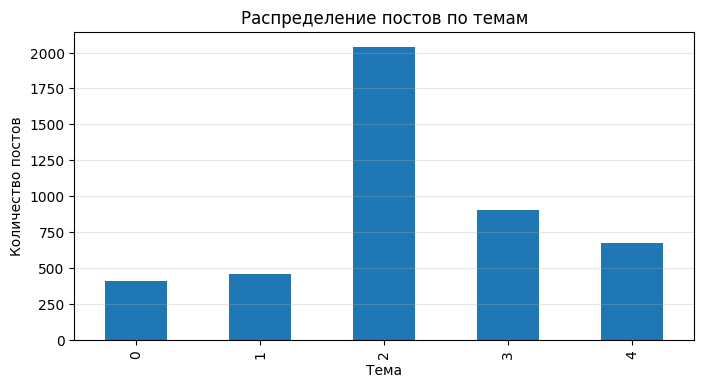

In [41]:
doc_topic_dist = lda.transform(dataset)
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()

# LDA (10 тем)

## Модель

In [42]:
lda2 = LDA(n_components = 10,
         max_iter=10,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda2.fit(dataset)

LatentDirichletAllocation(n_jobs=-1, random_state=42)

## Итог

In [43]:
tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda2, tf_feature_names, 15)

Тема 1: танкер, работа, волгонефть, мазут, морспасслужба, нефтепродукт, часть, судный, акватория, ликвидация, танкер волгонефть, пролив, специалист, затонуть, керченский
Тема 2: росморречфлот, морской, транспорт, россия, развитие, год, руководитель, андрей, также, вуз, водный, руководитель росморречфлот, тарасенко, андрей тарасенко, вопрос
Тема 3: корабль, охотник, охотник корабль, область, река, волга, спасибо, теплоход, фото, река волга, фото спасибо, сухогруз, буксиртолкач, сергей, баржа
Тема 4: год, это, день, который, первый, время, вода, место, работа, стать, свой, новый, капитан, самый, город
Тема 5: проект, порт, морской, год, завод, построить, строительство, новый, флот, судный, ледокол, морской порт, росморречфлот, работа, суд
Тема 6: москва, корабль, охотник, охотник корабль, канал, теплоход, шлюз, имя, канал имя, имя москва, год, ким, тип, шлюз ким, порт
Тема 7: морской, флот, порт, год, победа, наш, великий, морской порт, речной, сегодня, море, музей, война, речной флот, м

In [44]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda2.score(dataset))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda2.perplexity(dataset))

# See model parameters
print(lda2.get_params())

Log Likelihood:  -744933.5206476871
Perplexity:  385.1227949850902
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


## Визуализация

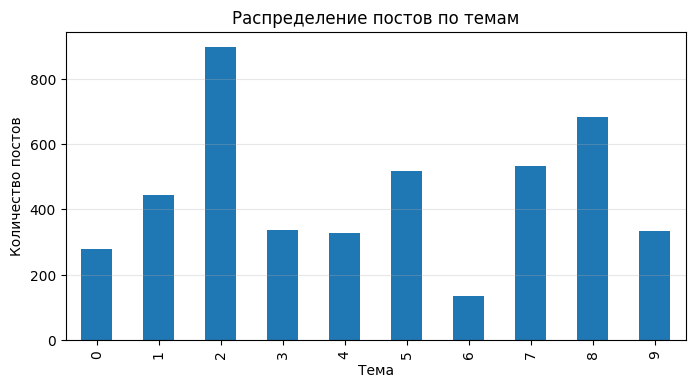

In [45]:
doc_topic_dist = lda2.transform(dataset)
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()

# LDA с GridSearchCV

## Модель

In [46]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LDA()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(dataset)
GridSearchCV(cv=None, error_score='raise',
       estimator=LDA(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=None, verbose=0)

GridSearchCV(error_score='raise', estimator=LatentDirichletAllocation(n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [10, 15, 20, 25, 30]})

## Результаты

In [47]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dataset))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -165804.99055460922
Model Perplexity:  397.36894078374866


In [48]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(dataset)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)] # type: ignore

# index names
docnames = ["Doc" + str(i) for i in range(len(df['posts']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold) # type: ignore
df_document_topics

C:\Users\melni\AppData\Local\Temp\ipykernel_17552\1124044985.py:27: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold) # type: ignore


In [49]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          3           1122
1          8            707
2          9            560
3          0            413
4          2            410
5          4            362
6          7            286
7          5            246
8          1            223
9          6            158

In [50]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

аварийноспасательный  аварийный     авария     август  автомобильный  \
Topic0              0.100007   0.100012   0.100010   0.100018       5.478427   
Topic1             59.055507  52.438019  17.739779   0.100046       0.100004   
Topic2              0.100010   0.100019   7.775834  40.302574       1.234564   
Topic3              0.100001   0.100003   0.100002   0.100004       0.100005   
Topic4              0.100007   0.100012   0.100013  22.988534       0.100006   

        автономный  агентство       адм  администрация   адмирал  ...  \
Topic0    0.100018   0.100010  0.100001     302.080910  0.100002  ...   
Topic1   18.766872   0.140356  0.100006       4.091170  0.100015  ...   
Topic2    4.218587   5.342118  0.100003       4.671391  0.100019  ...   
Topic3    0.100020   0.100000  0.100000       0.100001  0.100005  ...   
Topic4    1.558482   0.100016  0.100010       0.100013  2.438799  ...   

               это  эффективный      южный   являться     якорь     якутия  \
Topic0   86.199060     8.194635   0.194174  13.239866  1.171274   0.100084   
Topic1   69.458429     8.668411   0.100019  21.836626  1.252736   0.100005   
Topic2  103.533817     0.100007  36.943978   5.286373  1.190431   0.100008   
Topic3    0.100003     0.100001   0.100003   0.100005  3.695615   0.100000   
Topic4   73.091190     0.100019   0.100028  21.023844  3.633428  10.051881   

           январь  ярославский  ярославский область       яхта  
Topic0   1.777008     0.100005             0.100005   0.100002  
Topic1   0.100014     0.100003             0.100002   0.100011  
Topic2  17.392647     6.447607             0.100015  55.296171  
Topic3   0.279267    95.752341            88.099957  12.091387  
Topic4   0.107538     0.100014             0.100003   0.100006  

[5 rows x 1000 columns]

In [51]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0      Word 1           Word 2     Word 3         Word 4  \
Topic 0        бассейн      водный           работа       путь  администрация   
Topic 1         работа      судный          морской  акватория           вода   
Topic 2            год        порт         теплоход    капитан        который   
Topic 3        корабль     охотник  охотник корабль    область           река   
Topic 4            год        флот           проект  построить            наш   
Topic 5         москва       канал              имя     проект      канал имя   
Topic 6         танкер  волгонефть           работа      мазут          часть   
Topic 7           порт        груз            тонна     экипаж         судный   
Topic 8        корабль     охотник  охотник корабль     москва       теплоход   
Topic 9  росморречфлот     морской              год  транспорт       развитие   

                    Word 5         Word 6        Word 7      Word 8  \
Topic 0        водный путь      навигация           год        река   
Topic 1              место            лёд       система     который   
Topic 2           пассажир        морской  пассажирский       время   
Topic 3           сухогруз          волга      теплоход  река волга   
Topic 4               море        морской         завод     сегодня   
Topic 5         имя москва           шлюз           ким    шлюз ким   
Topic 6  танкер волгонефть  морспасслужба        пролив  керченский   
Topic 7                год           борт           млн  находиться   
Topic 8          москверек      александр        причал     спасибо   
Topic 9               порт         россия        речной      проект   

               Word 9         Word 10            Word 11            Word 12  \
Topic 0          шлюз      внутренний  внутренний водный          гидроузел   
Topic 1        объект  характеристика           операция       спасательный   
Topic 2         катер            вода            маршрут               рейс   
Topic 3       спасибо        грузовой       буксиртолкач             сергей   
Topic 4       корабль           музей                суд               день   
Topic 5           год       построить                тип               порт   
Topic 6  нефтепродукт      специалист         ликвидация  керченский пролив   
Topic 7          член       произойти                тыс        член экипаж   
Topic 8        речной            мост           васильев   васильев охотник   
Topic 9         также    руководитель       транспортный            который   

                    Word 13        Word 14  
Topic 0               канал         ремонт  
Topic 1        оборудование         учение  
Topic 2              первый            это  
Topic 3                фото            дон  
Topic 4             рубрика        история  
Topic 5            приписка  порт приписка  
Topic 6              судный        который  
Topic 7           млн тонна        морской  
Topic 8  александр васильев           фото  
Topic 9              водный         андрей

In [55]:
def plot_interactive_topics(best_lda_model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(best_lda_model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    
    return pd.DataFrame(topics)

In [56]:
plot_interactive_topics(best_lda_model, tf_feature_names)

Topic 0    Topic 1       Topic 2          Topic 3    Topic 4  \
0        бассейн     работа           год          корабль        год   
1         водный     судный          порт          охотник       флот   
2         работа    морской      теплоход  охотник корабль     проект   
3           путь  акватория       капитан          область  построить   
4  администрация       вода       который             река        наш   
5    водный путь      место      пассажир         сухогруз       море   
6      навигация        лёд       морской            волга    морской   
7            год    система  пассажирский         теплоход      завод   
8           река    который         время       река волга    сегодня   
9           шлюз     объект         катер          спасибо    корабль   

      Topic 5            Topic 6     Topic 7          Topic 8        Topic 9  
0      москва             танкер        порт          корабль  росморречфлот  
1       канал         волгонефть        груз          охотник        морской  
2         имя             работа       тонна  охотник корабль            год  
3      проект              мазут      экипаж           москва      транспорт  
4   канал имя              часть      судный         теплоход       развитие  
5  имя москва  танкер волгонефть         год        москверек           порт  
6        шлюз      морспасслужба        борт        александр         россия  
7         ким             пролив         млн           причал         речной  
8    шлюз ким         керченский  находиться          спасибо         проект  
9         год       нефтепродукт        член           речной          также

## Облака слов

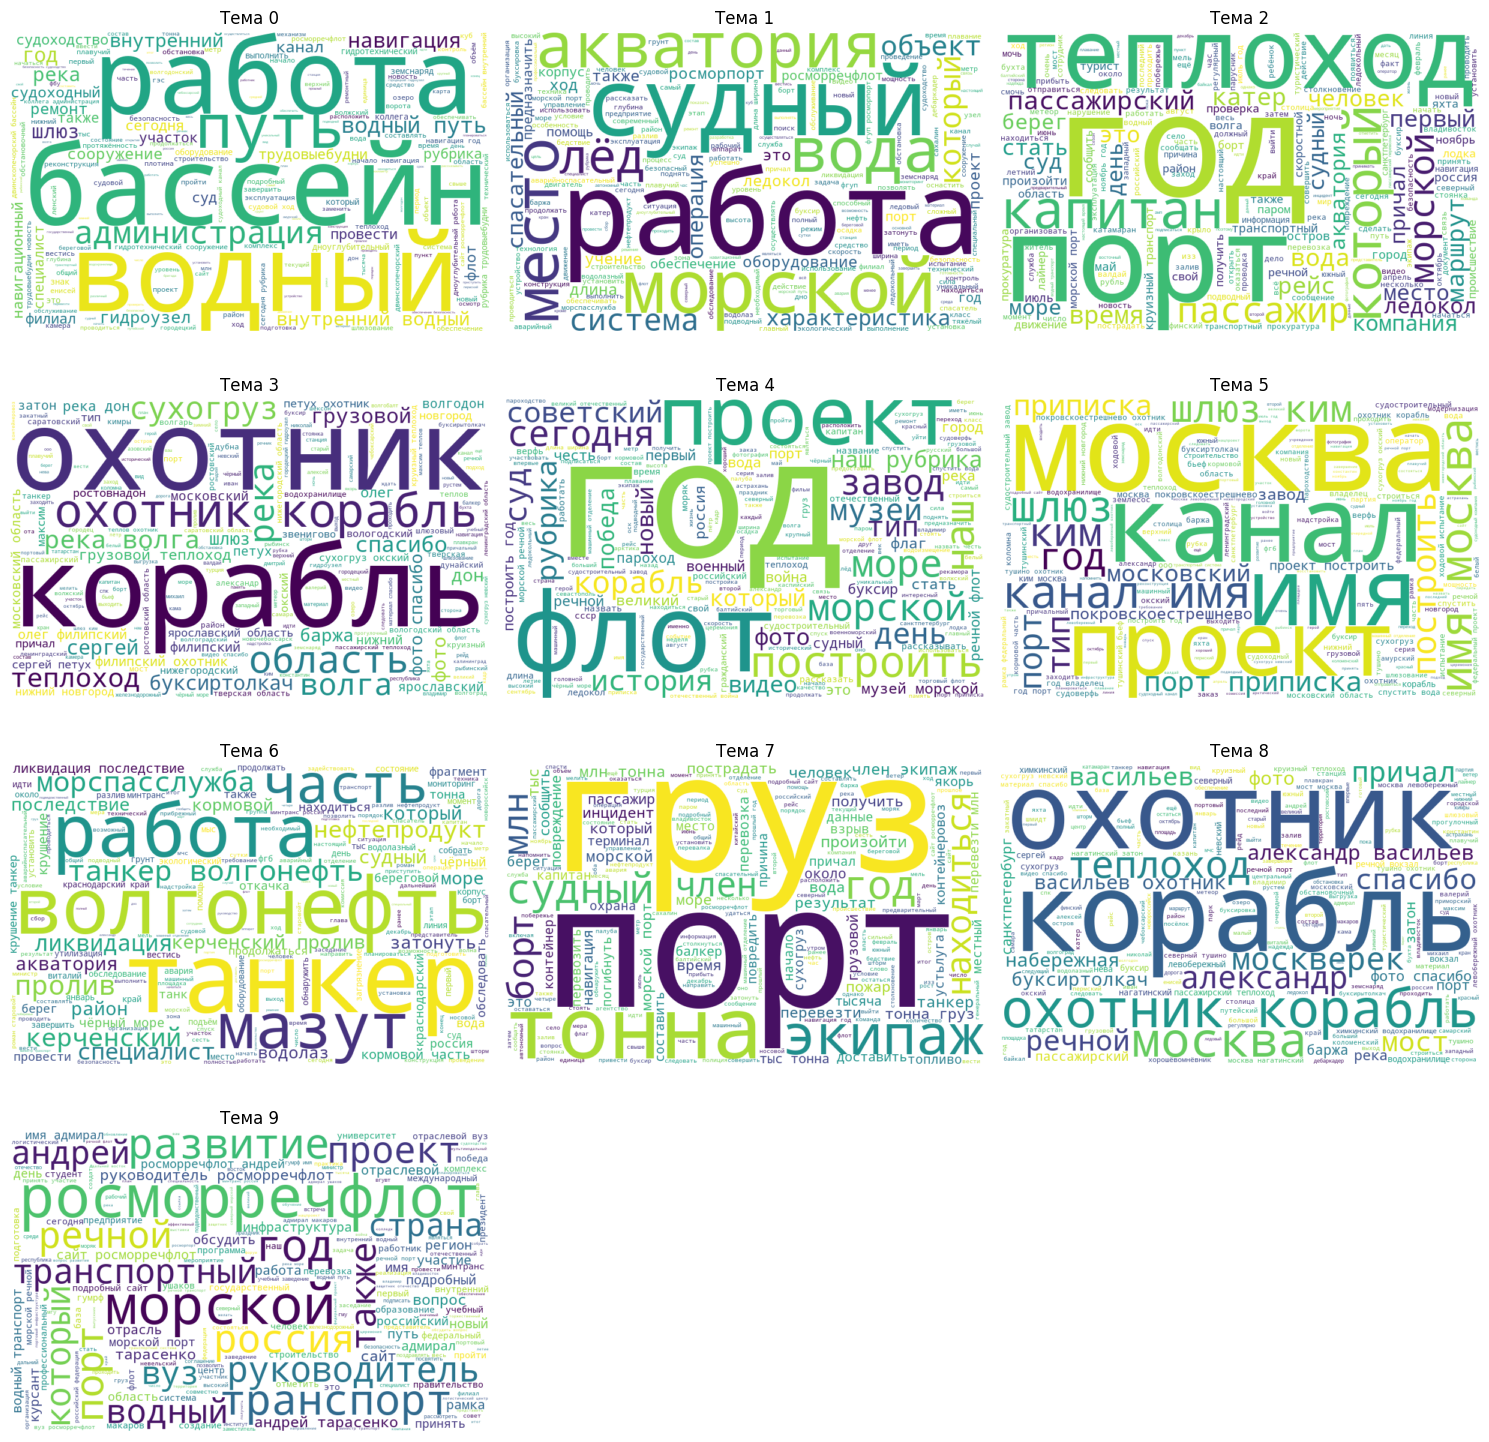

In [57]:
feature_names = count_vectorizer.get_feature_names_out()

n_topics = best_lda_model.components_.shape[0]

plt.figure(figsize=(15, 15))

for topic_idx, topic in enumerate(best_lda_model.components_):
    word_scores = {feature_names[i]: topic[i] for i in range(len(topic))}
    wordcloud = WordCloud(width=800, height=500, background_color="white", colormap="viridis").generate_from_frequencies(word_scores)

    plt.subplot(int(np.ceil(n_topics / 3)), 3, topic_idx + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Тема {topic_idx}")

plt.tight_layout()
plt.show()

# Gensim (LDA)

In [58]:
# Предобработка текста для тематического моделирования в gensim
# Для тематического моделирования часто полезно удалить очень редкие и очень частые слова

# Создание словаря
gensim_dictionary = Dictionary(texts_as_lists)

# Фильтрация слов: удаление очень редких (меньше 5 документов) и очень частых (встречаются более чем в 50% документов)
gensim_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Создание корпуса (мешок слов)
corpus = [gensim_dictionary.doc2bow(text, allow_update=True) for text in texts_as_lists]

print(f"Создан словарь с {len(gensim_dictionary)} уникальными токенами.")
print(f"Создан корпус из {len(corpus)} документов.")

Создан словарь с 15610 уникальными токенами.
Создан корпус из 4487 документов.


## Модель

In [59]:
# Применение алгоритма LDA
# Выбираем количество тем.
num_topics = 10

print(f"\nОбучение модели LDA с {num_topics} темами...")
# Обучение LDA модели
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=gensim_dictionary, passes=15) # Увеличиваем passes для лучшей сходимости

print("Обучение LDA модели завершено.")


Обучение модели LDA с 10 темами...
Обучение LDA модели завершено.


## Результаты

In [60]:
# Интерпретация тем
print("\nВыявленные темы:")
topics = lda_model.print_topics(num_words=10) # Выводим 10 наиболее значимых слов для каждой темы

for topic_id, topic_words in topics:
    print(f"Тема #{topic_id + 1}: {topic_words}")


Выявленные темы:
Тема #1: 0.016*"экипаж" + 0.013*"судный" + 0.011*"произойти" + 0.011*"борт" + 0.010*"человек" + 0.009*"танкер" + 0.009*"находиться" + 0.007*"порт" + 0.007*"получить" + 0.007*"результат"
Тема #2: 0.022*"танкер" + 0.018*"работа" + 0.016*"волгонефть" + 0.011*"мазут" + 0.011*"судный" + 0.009*"судно" + 0.008*"пролив" + 0.007*"нефтепродукт" + 0.007*"керченский" + 0.007*"часть"
Тема #3: 0.045*"корабль" + 0.041*"охотник" + 0.034*"область" + 0.027*"река" + 0.023*"теплоход" + 0.020*"волга" + 0.012*"сухогруз" + 0.010*"баржа" + 0.010*"спасибо" + 0.009*"буксиртолкач"
Тема #4: 0.022*"год" + 0.011*"порт" + 0.008*"судно" + 0.008*"морской" + 0.007*"построить" + 0.007*"ледокол" + 0.007*"проект" + 0.006*"вода" + 0.006*"море" + 0.006*"это"
Тема #5: 0.048*"корабль" + 0.044*"охотник" + 0.025*"теплоход" + 0.020*"порт" + 0.019*"тип" + 0.018*"сухогруз" + 0.018*"дон" + 0.017*"год" + 0.017*"река" + 0.017*"грузовой"
Тема #6: 0.087*"москва" + 0.049*"корабль" + 0.045*"охотник" + 0.027*"москверек" 

## Визуализация

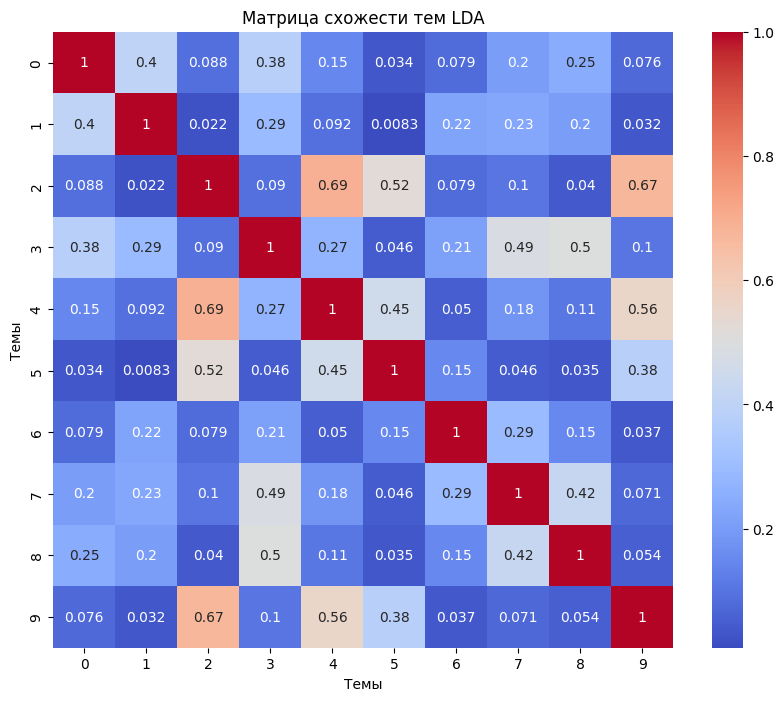

In [61]:
texts = [text.split() for text in df['posts']]
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

num_topics = lda_model.num_topics
topic_word_dist = []

for i in range(num_topics):
    topic_terms = lda_model.get_topic_terms(i, topn=len(gensim_dictionary))
    vector = np.zeros(len(gensim_dictionary))
    for word_id, weight in topic_terms:
        vector[word_id] = weight
    topic_word_dist.append(vector)

topic_word_dist = np.array(topic_word_dist)

# Косинусная схожесть между темами
similarity_matrix = cosine_similarity(topic_word_dist)

plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm")
plt.title("Матрица схожести тем LDA")
plt.xlabel("Темы")
plt.ylabel("Темы")
plt.show()

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

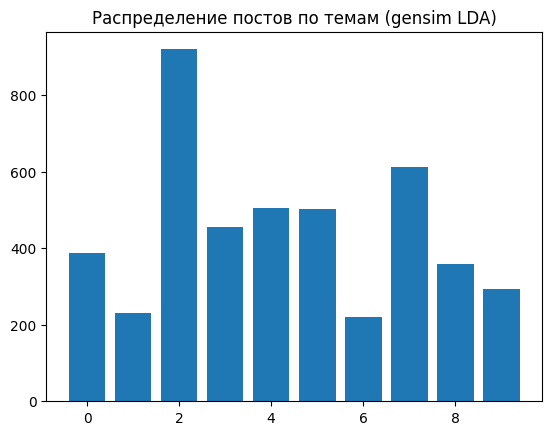

In [62]:
doc_topics = []

for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    doc_topics.append(dominant_topic)

counts = Counter(doc_topics)
plt.bar(counts.keys(), counts.values()) # type: ignore
plt.title("Распределение постов по темам (gensim LDA)")
plt.xlabel

# BERTopic

## Модель

In [63]:
from bertopic import BERTopic

documents = list(df['posts'])

topic_model = BERTopic(
    language="russian",
    n_gram_range=(1, 2),
    calculate_probabilities=True
)

topics, probs = topic_model.fit_transform(documents)

## Темы

In [64]:
topic_info = topic_model.get_topic_info()
num_topics = len(topic_info)
print(f"Всего найдено тем: {num_topics}")

for topic_num in topic_info.Topic:
    words = topic_model.get_topic(topic_num)
    
    if words:
        top_words = [word[0] for word in words[:10]] # type: ignore
        print(f"Тема #{topic_num}: {', '.join(top_words)}")

Всего найдено тем: 84
Тема #-1: корабль, охотник, охотник корабль, морской, год, росморречфлот, порт, теплоход, область, работа
Тема #0: мост, мост москва, москверек, охотник, охотник корабль, корабль, москва, сухогруз, закатный, мост ростовнадон
Тема #1: московский область, московский, имя москва, канал имя, москва, область, имя, канал, охотник, охотник корабль
Тема #2: ота, инженер шуткова, шуткова, рейдовый, шлюз, инженер, ота ота, вальс, барс, шлюзовый
Тема #3: адмирал, имя адмирал, вуз, курсант, специальность, отраслевой, имя, росморречфлот, морской, учебный
Тема #4: теплоход, пассажирский теплоход, круизный, пассажирский, круизный теплоход, охотник корабль, охотник, корабль пассажирский, корабль, река волга
Тема #5: река волга, река, волга, охотник корабль, охотник, корабль, баржа, корабль буксиртолкач, буксиртолкач, баржа река
Тема #6: приписка, порт приписка, проект построить, построить, тип, проект, год владелец, год, владелец, москва
Тема #7: лёд, ледокол, полярник, ледяной, 

## Визуализация

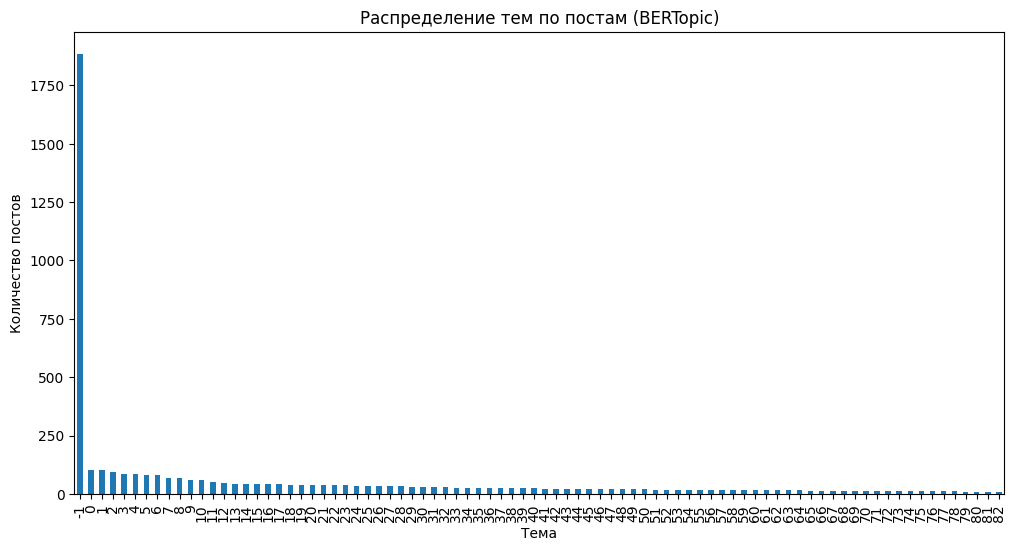

In [65]:
topics = topic_model.topics_

topic_counts = pd.Series(topics).value_counts().sort_index()

plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.title("Распределение тем по постам (BERTopic)")
plt.show()

# NMF

In [66]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    stop_words=list(russian_stopwords),
    max_df=0.9,
    min_df=2
)
tfidf = tfidf_vectorizer.fit_transform(df['posts'])

## Модель

In [67]:
# Create a TF-IDF vectorizer and fit_transform
tfidf_vectorizer = TfidfVectorizer(stop_words = list(russian_stopwords), max_df=0.9, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(df['posts'])

# Apply NMF
num_topics = 10  # Set the number of topics you want to identify
nmf_model = NMF(n_components=num_topics, init='random', random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf)

## Темы

In [68]:
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tf_feature_names, 15)

Тема 1: танкер, волгонефть, судный, мазут, работа, часть, морспасслужба, борт, вода, экипаж, нефтепродукт, район, который, находиться, затонуть
Тема 2: волга, область, река, охотник, корабль, ярославский, тверская, кимры, буксиртолкач, максим, теплов, сухогруз, баржа, саратовский, петух
Тема 3: москва, москверек, васильев, александр, охотник, корабль, буксиртолкач, баржа, мост, хорошёвомнёвник, набережная, нагатинский, теплоход, дорогомилово, причал
Тема 4: спасибо, фото, охотник, корабль, санктпетербург, теплоход, видео, анастасия, марус, материал, нева, река, закатный, шмидт, казань
Тема 5: звенигово, затон, сергей, марийэла, марфин, буксиртолкач, охотник, корабль, дунайский, баржа, волгарь, буксирытолкач, нагатинский, петух, бутяков
Тема 6: росморречфлот, морской, год, водный, путь, бассейн, развитие, работа, транспорт, навигация, внутренний, порт, проект, также, сайт
Тема 7: порт, сухогруз, тип, теплоход, год, приписка, построить, проект, окский, невский, москва, северный, тушино, 

## Визуализация

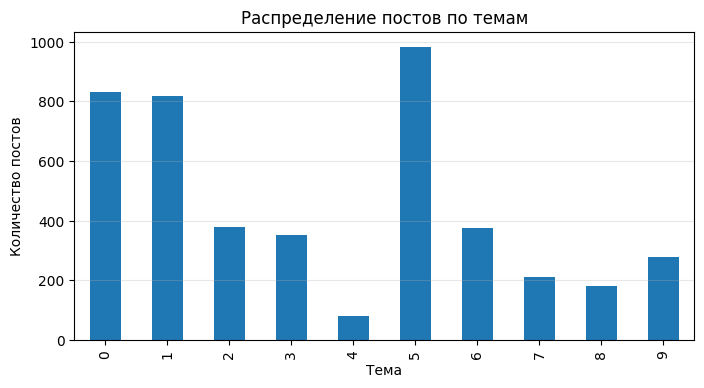

In [69]:
doc_topic_dist = nmf_matrix
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()

Размер словаря: 4312
Количество документов в корпусе: 4487

1. Оценка когерентности для LDA (scikit-learn)
Когерентность LDA (scikit-learn, c_v): 0.5726
Когерентность LDA (u_mass): -1.9568
Когерентность LDA (c_uci): 0.3557
Когерентность LDA (c_npmi): 0.0909

2. Оценка когерентности для LDA (gensim)
Когерентность LDA (gensim, c_v): 0.5904

3. Оценка когерентности для NMF
Когерентность NMF (c_v): 0.6849

4. Оценка когерентности для BERTopic
Когерентность BERTopic (c_v): 0.7179

5. СРАВНИТЕЛЬНЫЙ АНАЛИЗ КОГЕРЕНТНОСТИ МОДЕЛЕЙ

Результаты когерентности:
            Модель  Количество тем  Когерентность (c_v)
LDA (scikit-learn)              10             0.572644
      LDA (gensim)              10             0.590392
               NMF              10             0.684897
          BERTopic              83             0.717896


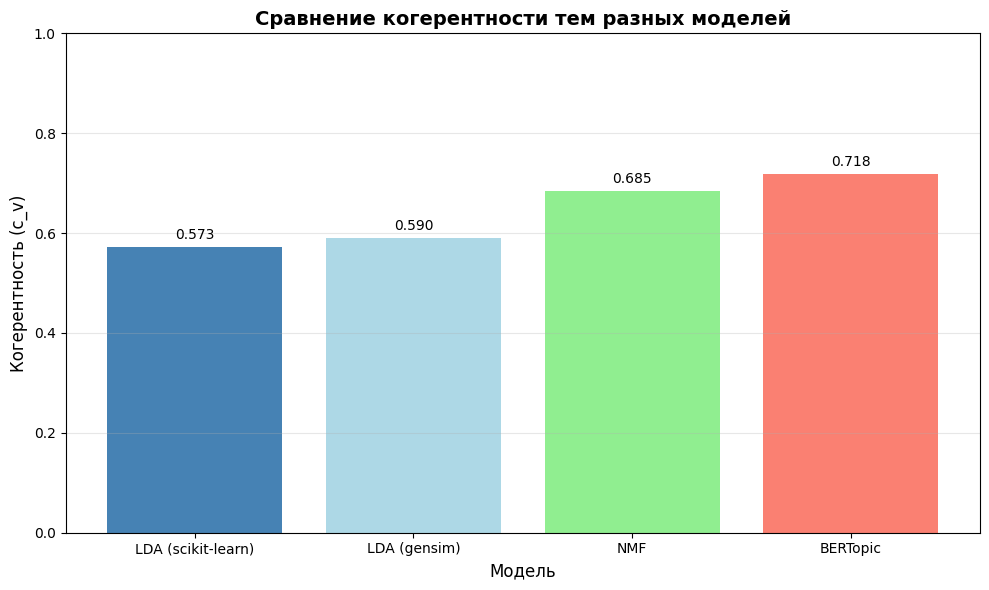


6. АНАЛИЗ КОГЕРЕНТНОСТИ ПО ТЕМАМ (пример для NMF)

Топ-5 наиболее когерентных тем для NMF:
  Тема 8: когерентность = 0.920, слова: победа, великий, защитник, отечество, летие
  Тема 2: когерентность = 0.755, слова: москва, москверек, васильев, александр, охотник
  Тема 9: когерентность = 0.746, слова: шлюз, москва, ким, канал, покровскоестрешнево
  Тема 4: когерентность = 0.730, слова: звенигово, затон, сергей, марийэла, марфин
  Тема 0: когерентность = 0.706, слова: танкер, волгонефть, судный, мазут, работа

Худшие 5 тем по когерентности для NMF:
  Тема 7: когерентность = 0.653, слова: олег, филипский, дон, охотник, ростовнадон
  Тема 5: когерентность = 0.640, слова: росморречфлот, морской, год, водный, путь
  Тема 1: когерентность = 0.614, слова: волга, область, река, охотник, корабль
  Тема 6: когерентность = 0.568, слова: порт, сухогруз, тип, теплоход, год
  Тема 3: когерентность = 0.518, слова: спасибо, фото, охотник, корабль, санктпетербург

Статистика когерентности тем NMF:
  С

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Подготовка токенизированных текстов для gensim
texts = df['posts'].tolist()
tokenized_texts = [text.split() for text in texts]

# Создание словаря и корпуса для gensim
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

print(f"Размер словаря: {len(dictionary)}")
print(f"Количество документов в корпусе: {len(corpus)}")

# Функции для извлечения топ-N слов из разных типов моделей

def get_top_words_sklearn_lda(model, feature_names, n_top_words=10):
    """Для LDA из scikit-learn"""
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics.append(top_features)
    return topics

def get_top_words_gensim_lda(model, n_top_words=10):
    """Для LDA из gensim"""
    topics = []
    for topic_id in range(model.num_topics):
        topic_terms = model.show_topic(topic_id, topn=n_top_words)
        topic_words = [word for word, _ in topic_terms]
        topics.append(topic_words)
    return topics

def get_top_words_nmf(model, feature_names, n_top_words=10):
    """Для NMF модели"""
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics.append(top_features)
    return topics

def get_top_words_bertopic(model, n_top_words=10):
    """Для BERTopic модели"""
    topics = []
    topic_info = model.get_topic_info()
    
    for topic_num in topic_info.Topic:
        if topic_num != -1:  # Исключаем тему с шумом
            words = model.get_topic(topic_num)
            if words:
                top_words = [word[0] for word in words[:n_top_words]]
                topics.append(top_words)
    return topics

# 1. Измерение когерентности для LDA (scikit-learn)
print("\n" + "="*60)
print("1. Оценка когерентности для LDA (scikit-learn)")
print("="*60)

try:
    # Используем лучшую модель LDA из GridSearchCV
    lda_topics_sklearn = get_top_words_sklearn_lda(best_lda_model, count_vectorizer.get_feature_names_out(), n_top_words=15)
    
    # Вычисляем когерентность
    coherence_model_lda = CoherenceModel(
        topics=lda_topics_sklearn,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Когерентность LDA (scikit-learn, c_v): {coherence_lda:.4f}")
    
    # Выводим другие метрики
    for coherence_type in ['u_mass', 'c_uci', 'c_npmi']:
        try:
            cm = CoherenceModel(
                topics=lda_topics_sklearn,
                texts=tokenized_texts,
                dictionary=dictionary,
                coherence=coherence_type
            )
            score = cm.get_coherence()
            print(f"Когерентность LDA ({coherence_type}): {score:.4f}")
        except:
            continue
            
except Exception as e:
    print(f"Ошибка при оценке LDA (scikit-learn): {e}")
    coherence_lda = 0

# 2. Измерение когерентности для LDA (gensim)
print("\n" + "="*60)
print("2. Оценка когерентности для LDA (gensim)")
print("="*60)

try:
    # Получаем темы из gensim LDA модели
    lda_topics_gensim = get_top_words_gensim_lda(lda_model, n_top_words=15)
    
    # Вычисляем когерентность
    coherence_model_gensim = CoherenceModel(
        topics=lda_topics_gensim,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_gensim = coherence_model_gensim.get_coherence()
    print(f"Когерентность LDA (gensim, c_v): {coherence_gensim:.4f}")
    
except Exception as e:
    print(f"Ошибка при оценке LDA (gensim): {e}")
    coherence_gensim = 0

# 3. Измерение когерентности для NMF
print("\n" + "="*60)
print("3. Оценка когерентности для NMF")
print("="*60)

try:
    # Получаем топ-слова для каждой темы NMF
    nmf_topics = get_top_words_nmf(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words=15)
    
    # Вычисляем когерентность
    coherence_model_nmf = CoherenceModel(
        topics=nmf_topics,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_nmf = coherence_model_nmf.get_coherence()
    print(f"Когерентность NMF (c_v): {coherence_nmf:.4f}")
    
except Exception as e:
    print(f"Ошибка при оценке NMF: {e}")
    coherence_nmf = 0

# 4. Измерение когерентности для BERTopic
print("\n" + "="*60)
print("4. Оценка когерентности для BERTopic")
print("="*60)

try:
    # Получаем темы из BERTopic
    bertopic_topics = get_top_words_bertopic(topic_model, n_top_words=15)
    
    # Вычисляем когерентность
    coherence_model_bertopic = CoherenceModel(
        topics=bertopic_topics,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_bertopic = coherence_model_bertopic.get_coherence()
    print(f"Когерентность BERTopic (c_v): {coherence_bertopic:.4f}")
    
except Exception as e:
    print(f"Ошибка при оценке BERTopic: {e}")
    coherence_bertopic = 0

# 5. Сравнительный анализ когерентности
print("\n" + "="*60)
print("5. СРАВНИТЕЛЬНЫЙ АНАЛИЗ КОГЕРЕНТНОСТИ МОДЕЛЕЙ")
print("="*60)

# Создаем DataFrame с результатами
coherence_results = pd.DataFrame({
    'Модель': ['LDA (scikit-learn)', 'LDA (gensim)', 'NMF', 'BERTopic'],
    'Количество тем': [
        len(lda_topics_sklearn) if 'lda_topics_sklearn' in locals() else 0,
        len(lda_topics_gensim) if 'lda_topics_gensim' in locals() else 0,
        len(nmf_topics) if 'nmf_topics' in locals() else 0,
        len(bertopic_topics) if 'bertopic_topics' in locals() else 0
    ],
    'Когерентность (c_v)': [
        coherence_lda, 
        coherence_gensim, 
        coherence_nmf, 
        coherence_bertopic
    ]
})

print("\nРезультаты когерентности:")
print(coherence_results.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(10, 6))
bars = plt.bar(coherence_results['Модель'], coherence_results['Когерентность (c_v)'], 
               color=['steelblue', 'lightblue', 'lightgreen', 'salmon'])
plt.title('Сравнение когерентности тем разных моделей', fontsize=14, fontweight='bold')
plt.xlabel('Модель', fontsize=12)
plt.ylabel('Когерентность (c_v)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, coherence_results['Когерентность (c_v)']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Анализ когерентности по отдельным темам
print("\n" + "="*60)
print("6. АНАЛИЗ КОГЕРЕНТНОСТИ ПО ТЕМАМ (пример для NMF)")
print("="*60)

def calculate_topic_coherence(topics, texts, dictionary, topic_name="Модель"):
    """
    Вычисляет когерентность для каждой темы отдельно
    """
    topic_coherences = []
    for i, topic_words in enumerate(topics):
        try:
            # Вычисляем когерентность для одной темы
            cm = CoherenceModel(
                topics=[topic_words],  # передаем список из одной темы
                texts=texts,
                dictionary=dictionary,
                coherence='c_v',
                processes=1
            )
            coherence = cm.get_coherence()
            topic_coherences.append((i, coherence, topic_words[:5]))  # первые 5 слов
        except:
            continue
    
    if not topic_coherences:
        print(f"Не удалось вычислить когерентность для {topic_name}")
        return []
    
    # Сортируем по когерентности
    topic_coherences.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nТоп-5 наиболее когерентных тем для {topic_name}:")
    for i, (topic_id, coherence, words) in enumerate(topic_coherences[:5]):
        print(f"  Тема {topic_id}: когерентность = {coherence:.3f}, слова: {', '.join(words)}")
    
    print(f"\nХудшие 5 тем по когерентности для {topic_name}:")
    for i, (topic_id, coherence, words) in enumerate(topic_coherences[-5:]):
        print(f"  Тема {topic_id}: когерентность = {coherence:.3f}, слова: {', '.join(words)}")
    
    return topic_coherences

# Анализируем NMF как пример
if 'nmf_topics' in locals():
    nmf_topic_coherences = calculate_topic_coherence(
        nmf_topics, 
        tokenized_texts, 
        dictionary, 
        "NMF"
    )
    
    # Статистический анализ
    if nmf_topic_coherences:
        coherences = [c for _, c, _ in nmf_topic_coherences]
        stats = {
            'Среднее': np.mean(coherences),
            'Медиана': np.median(coherences),
            'Стд. отклонение': np.std(coherences),
            'Минимум': np.min(coherences),
            'Максимум': np.max(coherences)
        }
        
        print("\nСтатистика когерентности тем NMF:")
        for key, value in stats.items():
            print(f"  {key}: {value:.3f}")

# 7. Сводная таблица результатов
print("\n" + "="*60)
print("7. СВОДНЫЕ РЕЗУЛЬТАТЫ")
print("="*60)

# Определение лучшей модели по когерентности
best_model_idx = coherence_results['Когерентность (c_v)'].idxmax()
best_model = coherence_results.loc[best_model_idx, 'Модель']
best_score = coherence_results.loc[best_model_idx, 'Когерентность (c_v)']

print(f"\nВЫВОД: Наилучшую когерентность показала модель '{best_model}'")
print(f"       с результатом {best_score:.4f} по метрике c_v")

# Интерпретация значений
print("\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ КОГЕРЕНТНОСТИ:")
print("• > 0.6: Отличная когерентность - темы четко определены")
print("• 0.4 - 0.6: Хорошая когерентность - темы в основном понятны")
print("• 0.2 - 0.4: Умеренная когерентность - некоторые темы требуют уточнения")
print("• < 0.2: Низкая когерентность - темы плохо определены")

# Дополнительно: сохранение результатов
results = {
    'coherence_scores': {
        'LDA_sklearn': coherence_lda,
        'LDA_gensim': coherence_gensim,
        'NMF': coherence_nmf,
        'BERTopic': coherence_bertopic
    },
    'coherence_results_df': coherence_results,
    'best_model': best_model,
    'best_score': best_score
}

print("\nРезультаты сохранены в переменной 'results'")
print("Для доступа используйте: results['coherence_scores'], results['coherence_results_df'], и т.д.")

# # Экспорт результатов в CSV
# coherence_results.to_csv('topic_coherence_results.csv', index=False, encoding='utf-8-sig')
# print("\nРезультаты экспортированы в файл: 'topic_coherence_results.csv'")

In [71]:
# 1. Измерение когерентности для LDA (scikit-learn)
print("\n" + "="*60)
print("1. Оценка когерентности для LDA (scikit-learn)")
print("="*60)

try:
    # Используем лучшую модель LDA из GridSearchCV
    lda_topics_sklearn = get_top_words_sklearn_lda(lda2, count_vectorizer.get_feature_names_out(), n_top_words=15)
    
    # Вычисляем когерентность
    coherence_model_lda = CoherenceModel(
        topics=lda_topics_sklearn,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Когерентность LDA (scikit-learn, c_v): {coherence_lda:.4f}")
    
    # Выводим другие метрики
    for coherence_type in ['u_mass', 'c_uci', 'c_npmi']:
        try:
            cm = CoherenceModel(
                topics=lda_topics_sklearn,
                texts=tokenized_texts,
                dictionary=dictionary,
                coherence=coherence_type
            )
            score = cm.get_coherence()
            print(f"Когерентность LDA ({coherence_type}): {score:.4f}")
        except:
            continue
            
except Exception as e:
    print(f"Ошибка при оценке LDA (scikit-learn): {e}")
    coherence_lda = 0


1. Оценка когерентности для LDA (scikit-learn)
Когерентность LDA (scikit-learn, c_v): 0.6164
Когерентность LDA (u_mass): -1.8508
Когерентность LDA (c_uci): 0.6400
Когерентность LDA (c_npmi): 0.1168
